In [1]:
# importing necessary libraries
import pandas as pd
from collections import Counter
import itertools

In [2]:
# loading the dataset
dataframe = pd.read_csv("creditcard.csv")

In [3]:
# viewing the first 5 rows of the dataset for a rough idea
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# checking for null values in the datset
dataframe.isnull().values.any()

False

In [5]:
#no null values

In [6]:
# summary of "Amount"
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
# check the number of occurrences of each class label and plot the information
# using matplotlib for plotting
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


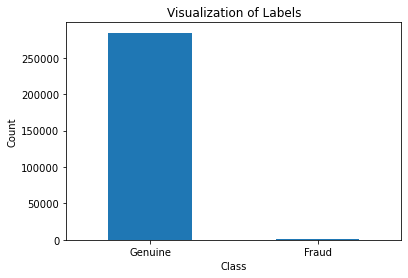

In [8]:
# now plotting
import matplotlib.pyplot as plt

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [9]:
# its observed that the genuine transactions are over 99% which is not correct. So apply scaling techniques on the “Amount” to transform the range of values.

In [10]:
# We will drop the original “Amount” column and add a new column with the scaled values.

In [12]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
Note: you may need to restart the kernel to use updated packages.
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=c7b7298db1096145a94086c832ce4e7d00bdbd5dfe6ca741b13dfeed2b80d66d
  Stored in directory: c:\users\ajay samuel victor\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [14]:
# splitting the given data into training data and test data
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.2, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (227845, 29)
Shape of test_X:  (56962, 29)


In [15]:
# now applying algorithm to this dataset
# this is a binary classification problem as we have to predict only 1 of the 2 class labels. 
# we can use SVM, Random Forest and Decison Tree etc.
# random forest creates several decision trees and merges them to get a more precise and reliable forecast

In [16]:
# we will build the Random Forest and Decision Tree Classifiers which are present in the sklearn package in the form of RandomForestClassifier() and DecisionTreeClassifier().

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [18]:
# now we will train this model on the given dataset
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.95962220427653
Decision Tree Score:  99.91397773954567


In [19]:
# comparing the performance of random forest and decision tree. Random Forest classifier has a slight edge over decision tree classifier

In [20]:
# creating a function to print the metrics(accuracy, precision, recall, and f1-score)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [25]:
from sklearn.metrics import plot_confusion_matrix

In [27]:
# visualize the confusion matrix and the evaluation metrics of our Decision Tree model
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[56835    29]
 [   20    78]]


In [28]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99914
Precision: 0.72897
Recall: 0.79592
F1-score: 0.76098


In [29]:
# visualize the confusion matrix and the evaluation metrics of our Random Forests
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[56862     2]
 [   21    77]]


In [30]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99960
Precision: 0.97468
Recall: 0.78571
F1-score: 0.87006


In [31]:
# The Random Forest model works better than Decision Trees. But, if we observe our dataset suffers a serious problem of class imbalance. The genuine transactions are more than 99% with the credit card fraud transactions constituting 0.17%.

In [32]:
# Oversampling is used to solve the class imbalance problem
# Oversample the minority class is one of the approaches to address the imbalanced datasets. The easiest solution entails doubling examples in the minority class, even though these examples contribute no new data to the model.
# Instead, new examples may be generated by replicating existing ones. The Synthetic Minority Oversampling Technique is a method of data augmentation for the minority class.
# Let’s import that and resample our data.

In [33]:
# we resampled our data and we split it using train_test_split() with a split of 80-20(i.e. train - 0.8, test - 0.2)

In [35]:
!pip install imbalanced-learn

In [36]:
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.2, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [37]:
# As the Random Forest algorithm performed better than the Decision Tree algorithm, we will apply the Random Forest algorithm to our resampled data.

In [38]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [39]:
print("Evaluation of Random Forest Model")
print()

metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99991
Precision: 0.99982
Recall: 1.00000
F1-score: 0.99991


In [40]:
# Now we can observe that our model performed much better than our previous Random Forest classifier without oversampling.

In [ ]:
# Accuracy of our model is now 99.9% which shows that this is a successful model and can predit credit card fraud.